In [1]:
from hanlp.utils.io_util import read_tsv

/home/bangsun/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def char2word(sent):
    chars = [cells[0] for cells in sent]
    tags = [cells[1] for cells in sent]
    if not chars:
        return
    words = []
    labels = []
    word = ''
    for i in range(len(chars)):
        ch = chars[i]
        tag = tags[i]
        tag_left,tag_right = tag.strip().split('-')
        if tag_left == 'B':
            if word:
                words.append(word)
            word = ch
            labels.append(tag_right)
        elif tag_left == 'I':
            word += ch
    words.append(word)
    assert len(words)==len(labels),"ERROR {} {}".format(words,labels)
    return words,labels

In [6]:
def show_seq_data(tsv_path):
    count = 0
    entity_nums = 0
    for sent in read_tsv(tsv_path):
        words,labels = char2word(sent)
        if count < 5:
            print(",".join(words)+"|"+",".join(labels))
        count += 1
        entity_nums += len(words)
    print("数据集总地址序列数量:", count)
    print("实体密度:", entity_nums/count)
train_path = './train.txt'
show_seq_data(train_path)

龙山镇,慈东,滨海区,海丰北路,602号|town,community,redundant,road,roadno
浙江省,杭州市,滨江区,缤纷北苑,47,-,6,-,746|prov,city,district,poi,houseno,redundant,cellno,redundant,roomno
浙江省,杭州市,余杭区,杭州市,余杭区,闲林街道,五常大道,翡翠城,竹苑|prov,city,district,redundant,redundant,town,road,poi,subpoi
浙江省,杭州市,滨江区,滨康路,1037号|prov,city,district,road,roadno
宁波市,江北区,文汇路,553弄,8号门,472|city,district,road,roadno,poi,roomno
数据集总地址序列数量: 14927
实体密度: 5.671735780799893


In [34]:
def print_data_nums(tsv_path,source="train"):
    count = 0
    for sent in read_tsv(tsv_path):
        count += 1
    print(" {}  {} +".format(count,source),end=" ")
train_path = './train.txt'
dev_path = './dev.txt'
test_path = './test.txt'
print_data_nums(train_path,source="train")
print_data_nums(dev_path,source="dev")
print_data_nums(test_path,source="test")

 8957  train +  2985  dev +  2985  test + 

In [29]:
def kind_nums_count(data_path,source="train"):
    labels = ['prov','city','district','devzone','town','community','country','road', 'roadno','subroad','subroadno','poi', 'subpoi', 'houseno','cellno','floorno','roomno','assist','person','redundant', 'otherinfo']
    count = {}
    for l in labels:
        count[l] = 0
    for sent in read_tsv(data_path):
        words,labels = char2word(sent)
        for t in labels:
            t = t.lower()
            count[t] += 1
    print(source+" 实体类别计数：")
    print("命名实体的种类数：{}".format(len(count)))
    print("总数:",sum(list(count.values())),",",end="")
    for k,v in count.items():
        print(k,":",v,",",end="")
    print("\n")
    return list(count.values())
train_kind = kind_nums_count(train_path,source="训练集")
dev_kind = kind_nums_count(dev_path,source="验证集")
test_kind = kind_nums_count(test_path,source="测试集")


训练集 实体类别计数：
命名实体的种类数：21
总数: 50934 ,prov : 3794 ,city : 4824 ,district : 5881 ,devzone : 330 ,town : 3972 ,community : 1279 ,country : 41 ,road : 5410 ,roadno : 4316 ,subroad : 333 ,subroadno : 170 ,poi : 6312 ,subpoi : 1435 ,houseno : 2993 ,cellno : 1134 ,floorno : 1119 ,roomno : 2702 ,assist : 718 ,person : 650 ,redundant : 3517 ,otherinfo : 4 ,

验证集 实体类别计数：
命名实体的种类数：21
总数: 17024 ,prov : 1317 ,city : 1662 ,district : 2027 ,devzone : 118 ,town : 1300 ,community : 415 ,country : 15 ,road : 1788 ,roadno : 1435 ,subroad : 109 ,subroadno : 68 ,poi : 2093 ,subpoi : 461 ,houseno : 978 ,cellno : 388 ,floorno : 346 ,roomno : 883 ,assist : 206 ,person : 207 ,redundant : 1208 ,otherinfo : 0 ,

测试集 实体类别计数：
命名实体的种类数：21
总数: 16704 ,prov : 1265 ,city : 1613 ,district : 1921 ,devzone : 107 ,town : 1308 ,community : 416 ,country : 13 ,road : 1801 ,roadno : 1401 ,subroad : 130 ,subroadno : 75 ,poi : 2122 ,subpoi : 487 ,houseno : 943 ,cellno : 358 ,floorno : 331 ,roomno : 824 ,assist : 241 ,person : 208 

In [38]:
#统计句子长度
from collections import defaultdict
def seq_length_count(train,dev,test):
    length_count = defaultdict(int)
    max_length = 0
    min_length = 10000
    count_t,count_d,count_test = 0,0,0
    for sent in read_tsv(train):
        count_t += 1
        words,labels = char2word(sent)
        word_join = "".join(words)
        length = len(word_join)
        max_length = max(length,max_length)
        min_length = min(length,min_length)
        idx = str(5*(length//5))
        length_count[idx] += 1
        if length>50:
            print("TOO LONG SEQUENCE: ",word_join)
    for sent in read_tsv(dev):
        words,labels = char2word(sent)
        word_join = "".join(words)
        length = len(word_join)
        max_length = max(length,max_length)
        min_length = min(length,min_length)
        idx = str(5*(length//5))
        length_count[idx] += 1
        count_d += 1
    for sent in read_tsv(test):
        words,labels = char2word(sent)
        word_join = "".join(words)
        length = len(word_join)
        max_length = max(length,max_length)
        min_length = min(length,min_length)
        idx = str(5*(length//5))
        length_count[idx] += 1
        count_test += 1
    print("句子数量:",count_t+count_d+count_test)

    print("最大句子长度：{}, 最小句子长度：{}".format(max_length,min_length))
    print("统计句子长度:",length_count)
    return length_count
seq_length_count(train_path,dev_path,test_path)

TOO LONG SEQUENCE:  广西壮族自治区柳州市鱼峰区荣军街道永意山语城10栋11单元119楼8号注_快递哥不用打电话直接放物业办公室谢谢哈不用电话了_本人电话太多请理解
TOO LONG SEQUENCE:  安徽省合肥市包河区经济开发区繁华大道与吉林路交叉口东南角联东U谷第一期104号楼1-4层安徽伊普诺康生物工程有限公司
句子数量: 14927
最大句子长度：76, 最小句子长度：3
统计句子长度: defaultdict(<class 'int'>, {'15': 5744, '20': 3461, '25': 1521, '10': 3417, '30': 536, '35': 161, '40': 49, '45': 11, '5': 18, '50': 3, '0': 2, '70': 1, '55': 1, '60': 1, '75': 1})


defaultdict(int,
            {'15': 5744,
             '20': 3461,
             '25': 1521,
             '10': 3417,
             '30': 536,
             '35': 161,
             '40': 49,
             '45': 11,
             '5': 18,
             '50': 3,
             '0': 2,
             '70': 1,
             '55': 1,
             '60': 1,
             '75': 1})

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(19680801)
from scipy.ndimage import gaussian_filter1d
# import pylab as mpl
# mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False

In [2]:
def data_change(dic_tianchi):
    print(len(dic_tianchi))
    y2_line = [0]*(len(dic_tianchi)+1)
    for k,v in dic_tianchi.items():
        y2_line[int(k)//5] = v
    y2_line = np.array(y2_line)
    return y2_line
dic_tianchi = {'15': 5744, '20': 3461, '25': 1521, '10': 3417, '30': 536, '35': 161, '40': 49, '45': 11, '5': 18, '50': 3, '0': 2, '70': 1, '55': 1, '60': 1, '75': 1}
seq_length_array = data_change(dic_tianchi)
print(len(seq_length_array))

15
16


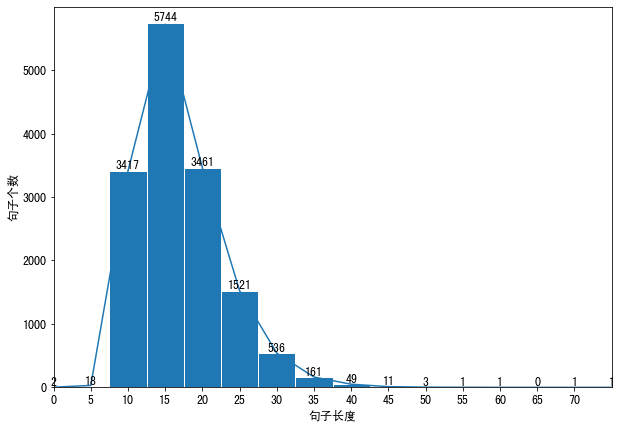

In [3]:
def data_plot(y_line):
    x_line = np.linspace(0,75,16)
# cornflowerblue
    fig,ax = plt.subplots(figsize=(10, 7))
    ys = gaussian_filter1d(y_line,sigma=0.3)
    rects = ax.bar(x_line, y_line, width=5, edgecolor="white")
    plt.tick_params(labelsize=12)
    ax.set(xlim=(0, 75), xticks=np.arange(0, 75,5),
        ylim=(0, 6000), yticks=np.arange(0, 6000,1000))
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('SimHei') for label in labels]
    font2 = {'family' : 'SimHei',
        'weight' : 'normal',
        'size' : 12,
        }
    ax.plot(x_line, ys)
    ax.bar_label(rects, label_type='edge', color="black",fontsize=12)
    ax.set_xlabel(u'句子长度',font2)  # Add an x-label to the axes.
    ax.set_ylabel(u'句子个数',font2)  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    plt.plot()
data_plot(seq_length_array)

In [5]:
def extract_nums(s):
    length = len(s)
    state = False
    ls = []
    number = ''
    for ch in s:
        if state and ch.isdigit():
            number += ch
        elif (not state) and ch.isdigit():
            state = True
            number = ch
        elif state and (not ch.isdigit()):
            state = False
            ls.append(int(number))
            number = ''
        else:
            continue
    if number:
        ls.append(int(number))
    return np.array(ls)

In [6]:
train_str = "总数: 50934 ,prov : 3794 ,city : 4824 ,district : 5881 ,devzone : 330 ,town : 3972 ,community : 1279 ,country : 41 ,road : 5410 ,roadno : 4316 ,subroad : 333 ,subroadno : 170 ,poi : 6312 ,subpoi : 1435 ,houseno : 2993 ,cellno : 1134 ,floorno : 1119 ,roomno : 2702 ,assist : 718 ,person : 650 ,redundant : 3517 ,otherinfo : 4"
dev_str = "总数: 17024 ,prov : 1317 ,city : 1662 ,district : 2027 ,devzone : 118 ,town : 1300 ,community : 415 ,country : 15 ,road : 1788 ,roadno : 1435 ,subroad : 109 ,subroadno : 68 ,poi : 2093 ,subpoi : 461 ,houseno : 978 ,cellno : 388 ,floorno : 346 ,roomno : 883 ,assist : 206 ,person : 207 ,redundant : 1208 ,otherinfo : 0"
test_str = "总数: 16704 ,prov : 1265 ,city : 1613 ,district : 1921 ,devzone : 107 ,town : 1308 ,community : 416 ,country : 13 ,road : 1801 ,roadno : 1401 ,subroad : 130 ,subroadno : 75 ,poi : 2122 ,subpoi : 487 ,houseno : 943 ,cellno : 358 ,floorno : 331 ,roomno : 824 ,assist : 241 ,person : 208 ,redundant : 1137 ,otherinfo : 3"
entity_nums_train = extract_nums(train_str)[1:]
entity_nums_dev = extract_nums(dev_str)[1:]
entity_nums_test = extract_nums(test_str)[1:]
entity_names = ["prov","city","district","devzone","town","community","country","road","roadno","subroad","subroadno","poi","subpoi","houseno","cellno","floorno" ,"roomno","assist","person","redundant","otherinfo"]
category_names = ["训练集","验证集","测试集"]
results = {}
for i,key in enumerate(entity_names):
    results[key]=[]
    results[key].append(entity_nums_train[i])
    results[key].append(entity_nums_dev[i])
    results[key].append(entity_nums_test[i])
    assert len(results[key])==3
assert len(results)==21
print(results)

{'prov': [3794, 1317, 1265], 'city': [4824, 1662, 1613], 'district': [5881, 2027, 1921], 'devzone': [330, 118, 107], 'town': [3972, 1300, 1308], 'community': [1279, 415, 416], 'country': [41, 15, 13], 'road': [5410, 1788, 1801], 'roadno': [4316, 1435, 1401], 'subroad': [333, 109, 130], 'subroadno': [170, 68, 75], 'poi': [6312, 2093, 2122], 'subpoi': [1435, 461, 487], 'houseno': [2993, 978, 943], 'cellno': [1134, 388, 358], 'floorno': [1119, 346, 331], 'roomno': [2702, 883, 824], 'assist': [718, 206, 241], 'person': [650, 207, 208], 'redundant': [3517, 1208, 1137], 'otherinfo': [4, 0, 3]}


(<Figure size 1440x720 with 1 Axes>, <AxesSubplot: >)

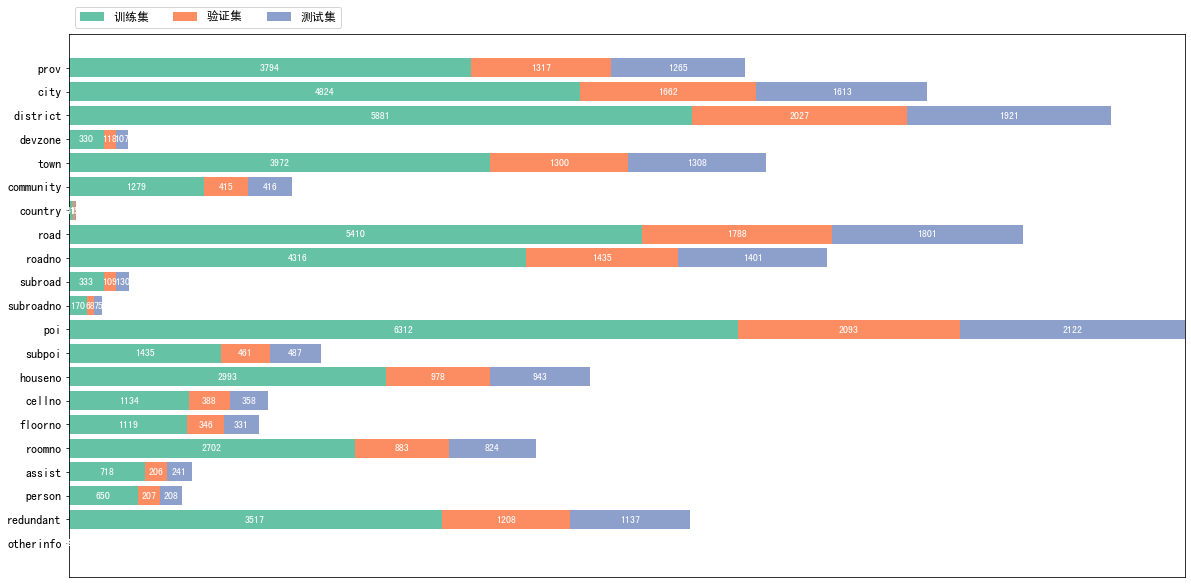

In [7]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels. RdYlGn
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    # category_colors = plt.get_cmap('tab20c')(
    #     np.linspace(0.15, 0.75, data.shape[1]))
    category_colors = plt.get_cmap('Set2')(
        np.arange(0,3))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    plt.tick_params(labelsize=12)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    font1 = {'family' : 'SimHei',
    'weight' : 'normal',
    'size' : 12,
    }

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left',prop=font1)
    return fig, ax
survey(results, category_names)